Purpose: Visualize accuracy, F1, & AUC for each stressor with different types of resampling (options: no resampling, control-stressed balancing only, control-stressed balancing after balancing among stressors).<br>
Author: Anna Pardo<br>
Date initiated: August 1, 2023

In [23]:
# import modules
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# set directories
dirnr = "../../data/rf_outputs/"
dircs = dirnr+"upsample_13-Jul-2023/"
dircsbs = dirnr+"all_stress_balance_13-Jul-2023/"

In [6]:
# make a dictionary of the directories
dirdict = {"no_resampling":dirnr,"ctrl_stress":dircs,"among_stress":dircsbs}

In [15]:
# generate a dictionary of dictionaries of dictionaries
masterdict = {}
for k in dirdict.keys():
    d = dirdict[k]
    masterdict[k] = {}
    if d == dirnr:
        for f in os.listdir(d):
            if f.endswith("_scores.json"):
                s = f.strip().split("Test")[0]
                masterdict[k][s] = json.load(open(d+f))
    else:
        # iterate through subdirectories
        for subd in os.listdir(d):
            for f in os.listdir(d+subd):
                if f.endswith("_scores.json"):
                    s = f.strip().split("Test")[0]
                    masterdict[k][s] = json.load(open(d+subd+"/"+f))

In [19]:
masterdict

{'no_resampling': {'Cold': {'Accuracy': 0.5316455696202531,
   'F1_class_0': 0.24489795918367346,
   'F1_class_1': 0.6605504587155964,
   'Precision_class_0': 0.8,
   'Precision_class_1': 0.5034965034965035,
   'Recall_class_0': 0.14457831325301204,
   'Recall_class_1': 0.96,
   'AUC': 0.6110932619366354},
  'Low_Nitrogen': {'Accuracy': 0.5637583892617449,
   'F1_class_0': 0.453781512605042,
   'F1_class_1': 0.6368715083798883,
   'Precision_class_0': 0.5869565217391305,
   'Precision_class_1': 0.5533980582524272,
   'Recall_class_0': 0.3698630136986301,
   'Recall_class_1': 0.75,
   'AUC': 0.5901225666906994},
  'Flooding': {'Accuracy': 0.6811594202898551,
   'F1_class_0': 0.35294117647058826,
   'F1_class_1': 0.7884615384615384,
   'Precision_class_0': 0.46153846153846156,
   'Precision_class_1': 0.7321428571428571,
   'Recall_class_0': 0.2857142857142857,
   'Recall_class_1': 0.8541666666666666,
   'AUC': 0.6577380952380952},
  'Salt': {'Accuracy': 0.8571428571428571,
   'F1_class_0

In [20]:
# generate a dataframe with columns for: each type of score; treatment/test set; resampling type
res = []
test = []
acc = []
f10 = []
f11 = []
p0 = []
p1 = []
r0 = []
r1 = []
auc = []
for r in masterdict.keys():
    for t in masterdict[r].keys():
        res.append(r)
        test.append(t)
        d = masterdict[r][t]
        acc.append(d["Accuracy"])
        f10.append(d["F1_class_0"])
        f11.append(d["F1_class_1"])
        p0.append(d["Precision_class_0"])
        p1.append(d["Precision_class_1"])
        r0.append(d["Recall_class_0"])
        r1.append(d["Recall_class_1"])
        auc.append(d["AUC"])

In [22]:
scores = pd.DataFrame(list(zip(res,test,acc,f10,f11,p0,p1,r0,r1,auc)),columns=["Resampling_Type","Test_Set","Accuracy","F1_Control",
                                                                     "F1_Stressed","Precision_Control","Precision_Stressed",
                                                                     "Recall_Control","Recall_Stressed","AUC"])

In [31]:
scores.head()

,Resampling_Type,Test_Set,Accuracy,F1_Control,F1_Stressed,Precision_Control,Precision_Stressed,Recall_Control,Recall_Stressed,AUC
0,no_resampling,Cold,0.531646,0.244898,0.660550,0.800000,0.503497,0.144578,0.960000,0.611093
1,no_resampling,Low_Nitrogen,0.563758,0.453782,0.636872,0.586957,0.553398,0.369863,0.750000,0.590123
2,no_resampling,Flooding,0.681159,0.352941,0.788462,0.461538,0.732143,0.285714,0.854167,0.657738
3,no_resampling,Salt,0.857143,0.826087,0.878788,1.000000,0.783784,0.703704,1.000000,0.968072
4,no_resampling,Heat,0.438287,0.183150,0.571977,0.396825,0.446108,0.119048,0.796791,0.539177


In [32]:
# calculate mean F1 (control & stressed) across treatments for each resampling type
cmean = []
smean = []
for r in scores["Resampling_Type"].unique():
    df = scores[scores["Resampling_Type"]==r]
    for i in range(0,6):
        cmean.append(sum(df["F1_Control"])/len(df["F1_Control"]))
        smean.append(sum(df["F1_Stressed"])/len(df["F1_Stressed"]))


In [35]:
scores["F1_Control_mean"] = cmean
scores["F1_Stressed_mean"] = smean
scores.head()

,Resampling_Type,Test_Set,Accuracy,F1_Control,F1_Stressed,Precision_Control,Precision_Stressed,Recall_Control,Recall_Stressed,AUC,F1_Control_mean,F1_Stressed_mean
0,no_resampling,Cold,0.531646,0.244898,0.660550,0.800000,0.503497,0.144578,0.960000,0.611093,0.44527,0.725373
1,no_resampling,Low_Nitrogen,0.563758,0.453782,0.636872,0.586957,0.553398,0.369863,0.750000,0.590123,0.44527,0.725373
2,no_resampling,Flooding,0.681159,0.352941,0.788462,0.461538,0.732143,0.285714,0.854167,0.657738,0.44527,0.725373
3,no_resampling,Salt,0.857143,0.826087,0.878788,1.000000,0.783784,0.703704,1.000000,0.968072,0.44527,0.725373
4,no_resampling,Heat,0.438287,0.183150,0.571977,0.396825,0.446108,0.119048,0.796791,0.539177,0.44527,0.725373


Text(0.5, 1.0, 'Accuracy')

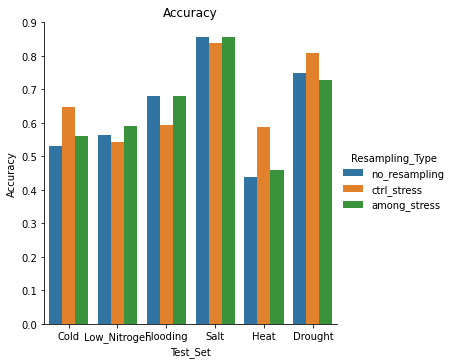

In [25]:
# make grouped bar plot of accuracy
sns.catplot(data=scores,kind="bar",x="Test_Set",y="Accuracy",hue="Resampling_Type")
plt.title("Accuracy")

Text(0.5, 1.0, 'AUC Score')

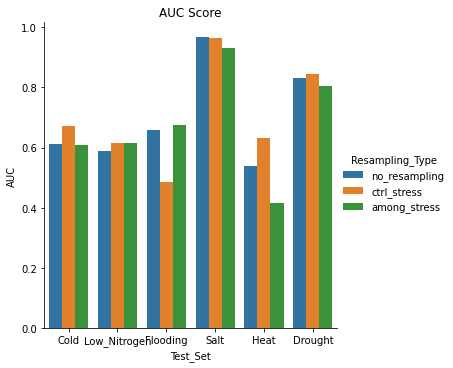

In [26]:
# make grouped bar plot of AUC
sns.catplot(data=scores,kind="bar",x="Test_Set",y="AUC",hue="Resampling_Type")
plt.title("AUC Score")

Text(0.5, 1.0, 'F1 of Control Predictions')

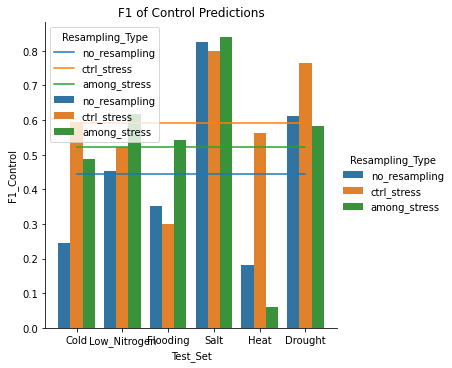

In [36]:
# make grouped bar plot of F1 for control samples
sns.catplot(data=scores,kind="bar",x="Test_Set",y="F1_Control",hue="Resampling_Type")
sns.lineplot(data=scores,x="Test_Set",y="F1_Control_mean",hue="Resampling_Type")
plt.title("F1 of Control Predictions")

Text(0.5, 1.0, 'F1 of Stressed Predictions')

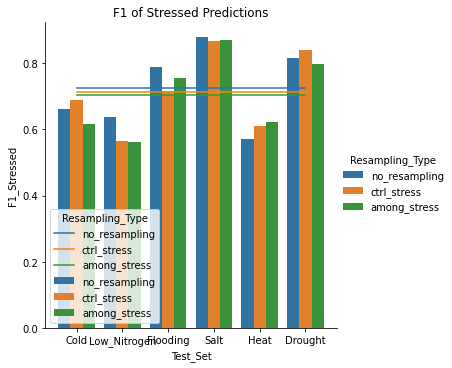

In [37]:
# make grouped bar plot of F1 for stressed samples
sns.catplot(data=scores,kind="bar",x="Test_Set",y="F1_Stressed",hue="Resampling_Type")
sns.lineplot(data=scores,x="Test_Set",y="F1_Stressed_mean",hue="Resampling_Type")
plt.title("F1 of Stressed Predictions")

Text(0.5, 1.0, 'Precision of Control Predictions')

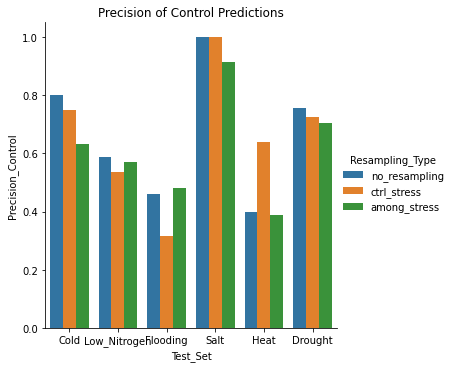

In [29]:
# make grouped bar plot of precision for control samples
sns.catplot(data=scores,kind="bar",x="Test_Set",y="Precision_Control",hue="Resampling_Type")
plt.title("Precision of Control Predictions")

Text(0.5, 1.0, 'Precision of Stressed Predictions')

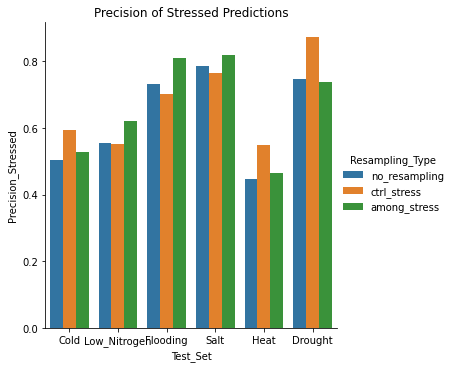

In [30]:
# make grouped bar plot of precision for stressed samples
sns.catplot(data=scores,kind="bar",x="Test_Set",y="Precision_Stressed",hue="Resampling_Type")
plt.title("Precision of Stressed Predictions")